# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [218]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [219]:
# Checking the number of mice.
unique_mice_count = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {unique_mice_count}")

Number of unique mice: 249


In [220]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [221]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [222]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
print(clean_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
1        k403     Ramicane    Male          21          16          5   
2        k403     Ramicane    Male          21          16         10   
3        k403     Ramicane    Male          21          16         15   
4        k403     Ramicane    Male          21          16         20   
5        k403     Ramicane    Male          21          16         25   
6        k403     Ramicane    Male          21          16         30   
7        k403     Ramicane    Male          21          16         35   
8        k403     Ramicane    Male          21          16         40   
9        k403     Ramicane    Male          21          16         45   
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3     

In [223]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_clean = clean_data['Mouse ID'].nunique()
print(f"Number of unique mice in the clean DataFrame: {unique_mice_count_clean}")

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [224]:
def calculate_sem(x):
    return st.sem(x)

In [225]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(st.sem)

summary_stats = pd.DataFrame({
    'Drug Regimen': mean.index,
    'Mean': mean.values,
    'Median': median.values,
    'Variance': variance.values,
    'Standard Deviation': std_dev.values,
    'SEM': sem.values
})

print(summary_stats)

  Drug Regimen       Mean     Median   Variance  Standard Deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.393463  50.909965  43.138803            6.568014  0.525862
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


In [226]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM=calculate_sem
).reset_index()
print(summary_stats)

TypeError: aggregate() missing 1 required positional argument: 'func_or_funcs'

## Bar and Pie Charts

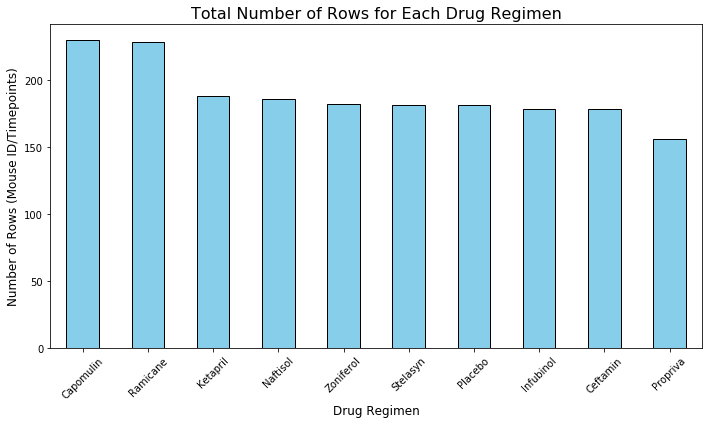

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Total Number of Rows for Each Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

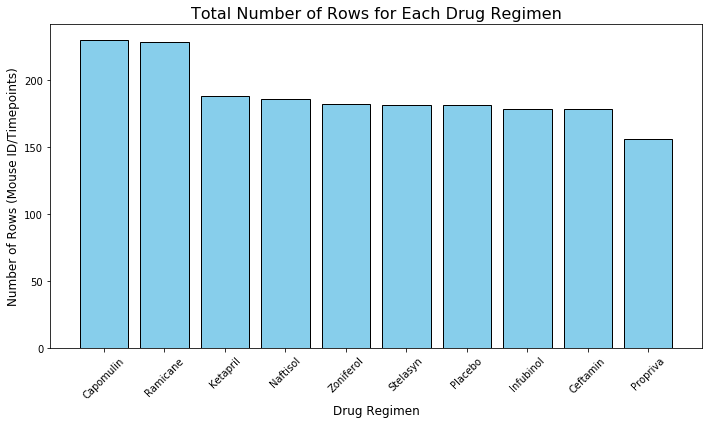

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.title('Total Number of Rows for Each Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

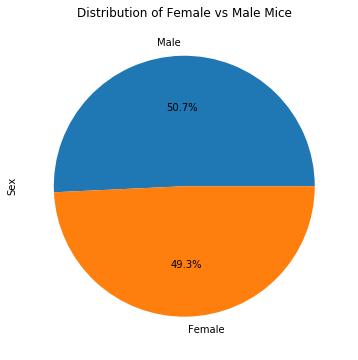

     Mouse ID     Sex
0        k403    Male
10       s185  Female
20       x401  Female
30       m601    Male
40       g791    Male
50       s508    Male
60       f966    Male
65       m546    Male
75       z578    Male
85       j913  Female
95       u364    Male
105      n364    Male
115      y793    Male
125      r554  Female
135      m957  Female
145      c758    Male
155      t565  Female
165      a644  Female
175      i177    Male
185      j989    Male
195      i738  Female
205      a520    Male
215      w914    Male
225      r811    Male
235      g288    Male
245      i334  Female
255      q610  Female
263      d251  Female
273      l897    Male
283      c458  Female
...       ...     ...
1684     w350    Male
1694     w422  Female
1704     w540  Female
1710     w575  Female
1720     w584    Male
1727     w697  Female
1735     w746    Male
1737     x111  Female
1740     x209  Female
1743     x226    Male
1744     x264  Female
1753     x336  Female
1754     x402    Male
1764     x

In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = clean_data['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice', figsize=(6, 6), labels=gender_counts.index)
plt.show()

# Get the unique mice with their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
print(unique_mice)

# Make the pie chart


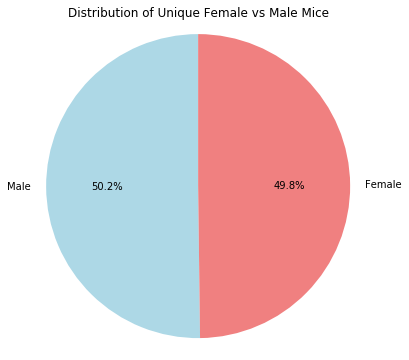

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Unique Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume_df = pd.merge(last_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])



    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol         45           67.973419
1       a251    Infubinol         45           65.525743
3       a275     Ceftamin         45           62.999356
6       a411     Ramicane         45           38.407618
7       a444     Ramicane         45           43.047543
10      a520     Ramicane         45           38.810366
11      a577    Infubinol         30           57.031862
12      a644     Ramicane         45           32.978522
13      a685    Infubinol         45           66.083066
19      b128    Capomulin         45           38.982878
21      b447     Ceftamin          0           45.000000
22      b487     Ceftamin         25           56.057749
24      b742    Capomulin         45           38.939633
25      b759     Ceftamin         30           55.742829
27      c139    Infubinol         45           72.226731
31      c326    Infubinol          5           36.321346
33      c458     Ramicane      

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(subset)

    # Determine outliers using upper and lower bounds
    if not subset.empty:
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
        print(f"{treatment} - Potential Outliers: {outliers.values}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    else:
        print(f"{treatment} - No data available for outlier calculation.")

Capomulin - Potential Outliers: [], Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Ramicane - Potential Outliers: [], Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
Infubinol - Potential Outliers: [36.3213458], Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
Ceftamin - Potential Outliers: [], Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999


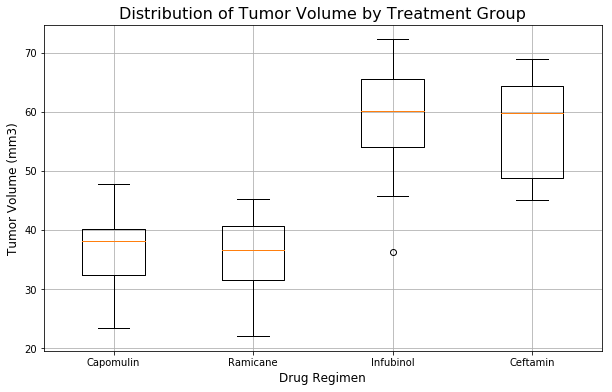

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot([final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments],
            labels=treatments)
plt.title('Distribution of Tumor Volume by Treatment Group', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)
plt.grid()
plt.show()

## Line and Scatter Plots

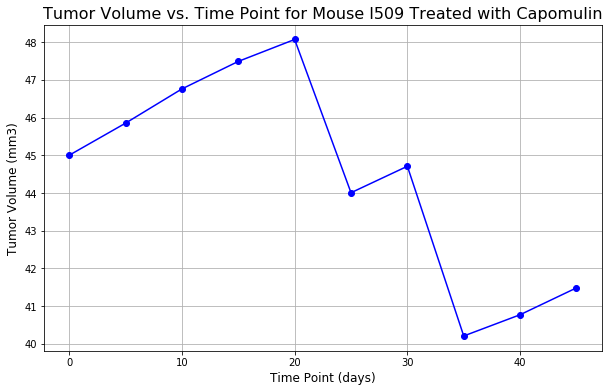

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  # Replace with the ID of the mouse you want to plot
mouse_data = clean_data[clean_data['Mouse ID'] == mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin', fontsize=16)
plt.xlabel('Time Point (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)
plt.grid()
plt.show()

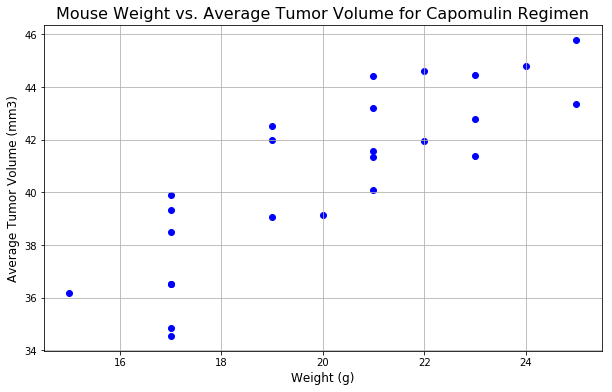

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
avg_tumor_volume = avg_tumor_volume.merge(mouse_weight_data, on='Mouse ID')
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=16)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.grid()
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694719
Linear Regression Results:
Slope: 0.9544396890241047
Intercept: 21.55216053268501
R-squared: 0.7088568047708721


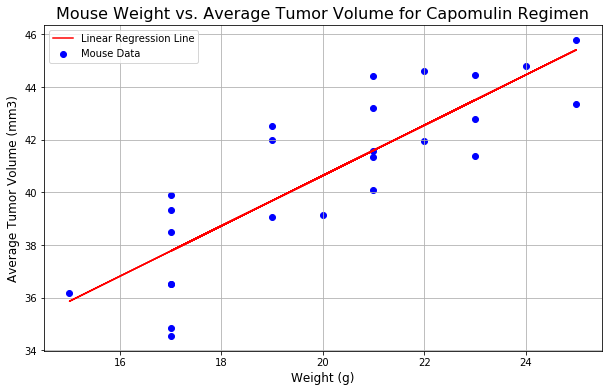

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
avg_tumor_volume = avg_tumor_volume.merge(mouse_weight_data, on='Mouse ID')
correlation = avg_tumor_volume['Weight (g)'].corr(avg_tumor_volume['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation}")
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
print(f"Linear Regression Results:\nSlope: {slope}\nIntercept: {intercept}\nR-squared: {r_value**2}")
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue', label='Mouse Data')
plt.plot(avg_tumor_volume['Weight (g)'], intercept + slope * avg_tumor_volume['Weight (g)'], color='red', label='Linear Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=16)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.legend()
plt.grid()
plt.show()